In [38]:
from pytriqs.gf import *
import numpy as np

a = 5
beta = 500.0
n_iw = 3000
iw_mesh = MeshImFreq(beta, 'Fermion', n_iw)

g = Gf(mesh=iw_mesh, target_shape=[2,2])
g  << 0.5*(inverse(iOmega_n - a) + inverse(iOmega_n + 2*a))

omax = (2*n_iw + 1)*3.1416/beta/(2*a)
print "omax", omax

omax 3.77054832


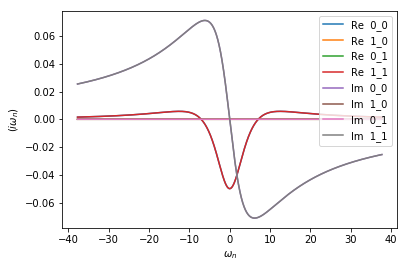

In [40]:
from pytriqs.plot.mpl_interface import *
%matplotlib inline
oplot(g)

In [3]:
def eval_tail(g):
    mytail, err  = g.fit_tail()
    def f(omega):
        z = 1.
        res = np.zeros(mytail.shape[1:], dtype='complex128')
        for n in range(mytail.shape[0]):
            res[:] += mytail[n,:] * z
            z = z / omega
        return res
    return f

In [4]:
print g.fit_tail()[1]

3.80850148358e-11


<function matplotlib.pyplot.show>

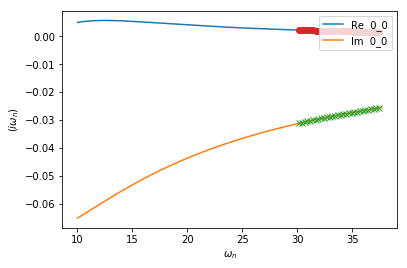

In [5]:
g_tail = eval_tail(g)

x_points = np.array([x.value for x in g.mesh][ -int(n_iw *(0.2)):-1:20])
y_points = np.array([g_tail(x,)[0,0] for x in x_points])

#print x_points
#print y_points 
oplot(g[0,0], x_window=(10,50))
plt.plot(x_points.imag, y_points.imag, 'x')
plt.plot(x_points.imag, y_points.real, 'o')
plt.show

In [6]:
def analy(n):
    return 0.5*((a)**(n-1) + (-2*a)**(n-1))
for n,x in enumerate(g.fit_tail()[0][:,0,0].real):
    print x/(analy(n))

3.58559101188e-06
0.999998177205
0.99958466357
0.99983154931
0.99448134072
0.995404551804
0.941298498267
0.94353917232
0.648938451573
0.65108739312


In [7]:
def f1(Nw) :
    iw_mesh = MeshImFreq(beta, 'Fermion', Nw)
    g = Gf(mesh=iw_mesh, target_shape=[2,2])
    g.mesh.set_tail_parameters(0.4, 500)
    g  << 0.5*(inverse(iOmega_n - a) + inverse(iOmega_n + 2*a))
    return g

def f(Nw) :
    g = f1(Nw)
    return g.fit_tail()[0][:,0,0].real 

In [8]:
X = np.arange(1000, 10000, 500)

X = np.arange(500, 6000, 500)

Xp = [((2*n + 1)*3.1416/beta)/(2*a) for n in X]

d = [f(x) for x in X]
def f2(n):
    return [dd[n]/analy(n) for dd in d]

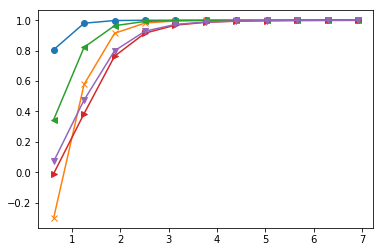

In [9]:
plt.plot(Xp, f2(1), '-o')
plt.plot(Xp, f2(2), '-x')
plt.plot(Xp, f2(3), '-<')
plt.plot(Xp, f2(4), '->')
plt.plot(Xp, f2(5), '-v')
#plt.plot(Xp, f2(6), '-*')

In [49]:
[(analy(n),  analy(2)**(n-1)) for n in range (10)]

[(0.05, -0.4),
 (1.0, 1.0),
 (-2.5, -2.5),
 (62.5, 6.25),
 (-437.5, -15.625),
 (5312.5, 39.0625),
 (-48437.5, -97.65625),
 (507812.5, 244.140625),
 (-4960937.5, -610.3515625),
 (50195312.5, 1525.87890625)]

In [10]:
zip(Xp,f2(2))

[(0.62894831999999989, -0.30105052411581207),
 (1.2572683200000001, 0.57844295781082267),
 (1.8855883200000001, 0.91407747821618146),
 (2.5139083200000001, 0.98155390243563434),
 (3.1422283200000001, 0.9953724546949374),
 (3.7705483200000005, 0.99863445390271777),
 (4.3988683200000001, 0.99953815695333748),
 (5.0271883199999996, 0.99982472121569121),
 (5.65550832, 0.99992674737044107),
 (6.2838283199999996, 0.99996687173618093),
 (6.91214832, 0.99998393674979158)]

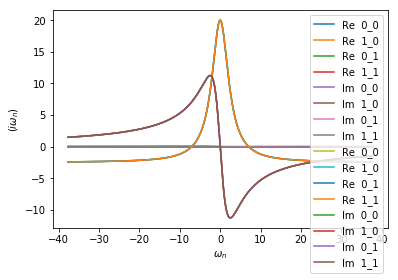

In [41]:
delta = g.copy()
for w in g.mesh:
    #print g[w]
    delta[w] = w - 1/g[w][0,0]
oplot(g)
oplot(delta)

In [52]:
t, err = delta.fit_tail()
ta = delta.tail.inverse()
print ta, g.tail
t = t[2,0,0].real
print t, - ta[2][0,0], abs(t + ta[2][0,0])/t

g.mesh.set_tail_parameters(0.2, 200)

km = np.zeros((2,2,2)) * 1j #, dtype = np.dcomplex64)
km[1,:] = np.eye(2,2)
t2, err2 = g.fit_tail(km)
t2 = t2[4,0,0].real
print abs(t2 - g.tail[4][0,0])/t2



 ...  Order -2 = 
[[(0,0),(0,0)]
 [(0,0),(0,0)]]
 ...  Order -1 = 
[[(1,0),(0,0)]
 [(0,-0),(1,0)]]
 ...  Order 0 = 
[[(2.5,0),(0,0)]
 [(0,0),(2.5,0)]]
 ...  Order 1 = 
[[(-56.25,0),(0,0)]
 [(0,0),(-56.25,0)]]
 ...  Order 2 = 
[[(140.625,0),(0,0)]
 [(0,0),(140.625,0)]]
 ...  Order 3 = 
[[(-351.562,0),(0,0)]
 [(0,0),(-351.562,0)]]
 ...  Order 4 = 
[[(878.906,0),(0,0)]
 [(0,0),(878.906,0)]]
 ...  Order 5 = 
[[(-2197.27,0),(0,0)]
 [(0,0),(-2197.27,0)]]
 ...  Order 6 = 
[[(5493.16,0),(0,0)]
 [(0,0),(5493.16,0)]]
 ...  Order 7 = 
[[(0,0),(0,0)]
 [(0,0),(0,0)]]
 ...  Order 8 = 
[[(0,0),(0,0)]
 [(0,0),(0,0)]] 
 ...  Order -2 = 
[[(0,0),(0,0)]
 [(0,0),(0,0)]]
 ...  Order -1 = 
[[(0,0),(0,0)]
 [(0,0),(0,0)]]
 ...  Order 0 = 
[[(0,0),(0,0)]
 [(0,0),(0,0)]]
 ...  Order 1 = 
[[(1,0),(0,0)]
 [(0,0),(1,0)]]
 ...  Order 2 = 
[[(-2.5,0),(0,0)]
 [(0,0),(-2.5,0)]]
 ...  Order 3 = 
[[(62.5,0),(0,0)]
 [(0,0),(62.5,0)]]
 ...  Order 4 = 
[[(-437.5,0),(0,0)]
 [(0,0),(-437.5,0)]]
 ...  Order 5 = 
[[(5312.5,0)

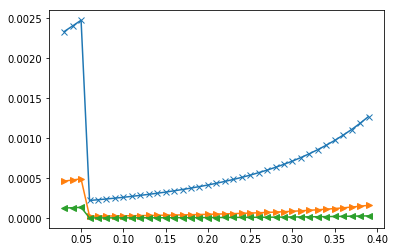

In [15]:
def l(R, Nw, Nkeep, rcond = 1.e-6):
    n = 2
    g = f1(Nw)
    g.mesh.set_tail_parameters(R, Nkeep, rcond)
    t2, err2 = g.fit_tail() #km)
    t2 = t2[n,0,0].real
    return abs((t2 - g.tail[n][0,0])/t2)

xp = np.arange(0.03, 0.4, 0.01)
#plt.plot(xp, [l(x,2000, 200) for x in xp], '-o')
#plt.plot(xp, [l(x,2000, 100) for x in xp], '-v')
#plt.plot(xp, [l(x,2000, 20) for x in xp], '-*')

plt.plot(xp, [l(x, 3000, 100) for x in xp], '-x')
plt.plot(xp, [l(x, 4000, 100) for x in xp], '->')
plt.plot(xp, [l(x, 5000, 100) for x in xp], '-<')

In [14]:
%%timeit
f(5000)

1 loop, best of 3: 434 ms per loop
